### 导入数据

In [1]:
import pandas as pd
import numpy as np
node_features = pd.read_csv('D:/DPIs/data/Drug_Protein_Attribute.csv',header = None) 
Attributes = node_features.iloc[:,1:]
node_features.head()  

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.00496,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
1,1,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.00496,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
2,2,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.00496,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
3,3,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.00496,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
4,4,1.180584,0.526513,0.793145,-0.245426,-0.220634,0.559357,1.059898,0.148331,-0.98174,...,0.003815,-0.553314,0.003378,0.335591,0.143528,-1.134055,0.62961,0.330191,0.377519,-0.798777


### 比较不同属性

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
import math

In [3]:
# 评价指标
def MyConfusionMatrix(y_real,y_predict): 
    from sklearn.metrics import confusion_matrix
    CM = confusion_matrix(y_real, y_predict)
    print(CM)
    CM = CM.tolist()
    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    TP = CM[1][1]
    print('TN:%d, FP:%d, FN:%d, TP:%d' % (TN, FP, FN, TP))
    Acc = (TN + TP) / (TN + TP + FN + FP)
    Sen = TP / (TP + FN)
    Spec = TN / (TN + FP)
    Prec = TP / (TP + FP)
    MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # 分母可能出现0，需要讨论待续
    print('Acc:', round(Acc, 4))
    print('Sen:', round(Sen, 4))
    print('Spec:', round(Spec, 4))
    print('Prec:', round(Prec, 4))
    print('MCC:', round(MCC, 4))
    Result = []
    Result.append(round(Acc, 4))
    Result.append(round(Sen, 4))
    Result.append(round(Spec, 4))
    Result.append(round(Prec, 4))
    Result.append(round(MCC, 4))
    return Result

def MyAverage(matrix):
    SumAcc = 0
    SumSen = 0
    SumSpec = 0
    SumPrec = 0
    SumMcc = 0
    counter = 0
    while counter < len(matrix):
        SumAcc = SumAcc + matrix[counter][0]
        SumSen = SumSen + matrix[counter][1]
        SumSpec = SumSpec + matrix[counter][2]
        SumPrec = SumPrec + matrix[counter][3]
        SumMcc = SumMcc + matrix[counter][4]
        counter = counter + 1
    print('AverageAcc:',SumAcc / len(matrix))
    print('AverageSen:', SumSen / len(matrix))
    print('AverageSpec:', SumSpec / len(matrix))
    print('AveragePrec:', SumPrec / len(matrix))
    print('AverageMcc:', SumMcc / len(matrix))
    return

def MyStd(result):
    import numpy as np
    NewMatrix = []
    counter = 0
    while counter < len(result[0]):
        row = []
        NewMatrix.append(row)
        counter = counter + 1
    counter = 0
    while counter < len(result):
        counter1 = 0
        while counter1 < len(result[counter]):
            NewMatrix[counter1].append(result[counter][counter1])
            counter1 = counter1 + 1
        counter = counter + 1
    StdList = []
    MeanList = []
    counter = 0
    while counter < len(NewMatrix):
        # std
        arr_std = np.std(NewMatrix[counter], ddof=1)
        StdList.append(arr_std)
        # mean
        arr_mean = np.mean(NewMatrix[counter])
        MeanList.append(arr_mean)
        counter = counter + 1
    result.append(MeanList)
    result.append(StdList)
    # 换算成百分比制
    counter = 0
    while counter < len(result):
        counter1 = 0
        while counter1 < len(result[counter]):
            result[counter][counter1] = round(result[counter][counter1] * 100, 2)
            counter1 = counter1 + 1
        counter = counter + 1
    return result

#### 只有Attribute

In [4]:
import scipy.sparse as sp
import pandas as pd
import numpy as np
creat_var = locals() # 利用locals()创建变量
creat_var = locals() # 利用locals()创建变量
Negative = pd.read_csv('D:/DPIs/data/NegativeSample.csv',header=None)
Nindex = pd.read_csv('D:/DPIs/data/NewRandomList.csv',header=None)
Negative[2] = Negative.apply(lambda x: 0 if x[0] < 0 else 0, axis=1)
for i in range(5):
    data_train_feature, data_test_feature = [], []
#     Embedding_GCN = pd.read_csv('./data/Emdebding_GCN'+str(i)+'.csv',header=None)
#     Embedding_Node2vec = pd.read_csv('./data/Embedding_Node2vec'+str(i)+'.txt', sep=' ',header=None)
#     Embedding_Node2vec = Embedding_Node2vec.sort_values(0,ascending=True)# 建立序号排序
#     Embedding_Node2vec.reset_index(drop=True, inplace=True) 
#     Embedding_Node2vec = Embedding_Node2vec.iloc[:,1:]
    train_data = pd.read_csv('D:/DPIs/data/DTIs_train'+str(i)+'.csv',header=None)
    train_data[2] = train_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    kk = []
    for j in range(5):
        if j !=i:
            kk.append(j)
    index = np.hstack([np.array(Nindex)[kk[0]],np.array(Nindex)[kk[1]],np.array(Nindex)[kk[2]],np.array(Nindex)[kk[3]]])
    result = train_data.append(pd.DataFrame(np.array(Negative)[index]))    
    labels_train = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[r,0]],np.array(Embedding_Node2vec)[result.iloc[r,0]]])
    for r in range(len(result)):# np.hstack([np.array(Embedding_GCN)[result.iloc[r,1]],np.array(Embedding_Node2vec)[result.iloc[r,1]]])
        data_train_feature.append(np.hstack([np.array(Attributes)[result.iloc[r,0]],
                                             np.array(Attributes)[result.iloc[r,1]]]))
    creat_var['A_data_train'+str(i)] = data_train_feature
    creat_var['A_labels_train'+str(i)] = labels_train
    print(len(labels_train))
    del labels_train, result, data_train_feature, r
    test_data = pd.read_csv('D:/DPIs/data/DTIs_test'+str(i)+'.csv',header=None)
    test_data[2] = test_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    result = test_data.append(pd.DataFrame(np.array(Negative)[np.array(Nindex)[i]]))    
    labels_test = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[x,0]],np.array(Embedding_Node2vec)[result.iloc[x,0]]])
    for x in range(len(result)):#np.hstack([np.array(Embedding_GCN)[result.iloc[x,1]],np.array(Embedding_Node2vec)[result.iloc[x,1]]])
        data_test_feature.append(np.hstack([np.array(Attributes)[result.iloc[x,0]],
                                            np.array(Attributes)[result.iloc[x,1]]]))
    creat_var['A_data_test'+str(i)] = data_test_feature
    creat_var['A_labels_test'+str(i)] = labels_test
    print(len(labels_test))
    del train_data, test_data, labels_test, result, data_test_feature, x   
    print(i)

18240
4560
0
18240
4560
1
18240
4560
2
18240
4560
3
18240
4560
4


In [5]:
A_data_train = [A_data_train0,A_data_train1,A_data_train2,A_data_train3,A_data_train4]
A_data_test = [A_data_test0,A_data_test1,A_data_test2,A_data_test3,A_data_test4]
A_labels_train = [A_labels_train0,A_labels_train1,A_labels_train2,A_labels_train3,A_labels_train4]
A_labels_test = [A_labels_test0,A_labels_test1,A_labels_test2,A_labels_test3,A_labels_test4]
print(len(A_data_train0))
print(np.array(A_data_train0).shape)
print(len(A_labels_test0))
print(np.array(A_labels_test0).shape)

18240
(18240, 128)
4560
(4560,)


进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[16:17:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[1961  319]
 [ 334 1946]]
---------------------------------------------

fold =  0
---------------------------------------------

[[1961  319]
 [ 334 1946]]
TN:1961, FP:319, FN:334, TP:1946
Acc: 0.8568
Sen: 0.8535
Spec: 0.8601
Prec: 0.8592
MCC: 0.7136
正在划分训练集和测试集...
划分完毕！
开始训练
[16:17:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2695951847.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[1933  347]
 [ 325 1955]]
---------------------------------------------

fold =  1
---------------------------------------------

[[1933  347]
 [ 325 1955]]
TN:1933, FP:347, FN:325, TP:1955
Acc: 0.8526
Sen: 0.8575
Spec: 0.8478
Prec: 0.8493
MCC: 0.7053
正在划分训练集和测试集...
划分完毕！
开始训练
[16:17:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2695951847.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2001  279]
 [ 328 1952]]
---------------------------------------------

fold =  2
---------------------------------------------

[[2001  279]
 [ 328 1952]]
TN:2001, FP:279, FN:328, TP:1952
Acc: 0.8669
Sen: 0.8561
Spec: 0.8776
Prec: 0.8749
MCC: 0.7339
正在划分训练集和测试集...
划分完毕！
开始训练
[16:18:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2695951847.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[1979  301]
 [ 346 1934]]
---------------------------------------------

fold =  3
---------------------------------------------

[[1979  301]
 [ 346 1934]]
TN:1979, FP:301, FN:346, TP:1934
Acc: 0.8581
Sen: 0.8482
Spec: 0.868
Prec: 0.8653
MCC: 0.7164
正在划分训练集和测试集...
划分完毕！
开始训练
[16:18:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2695951847.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2005  275]
 [ 362 1918]]
---------------------------------------------

fold =  4
---------------------------------------------

[[2005  275]
 [ 362 1918]]
TN:2005, FP:275, FN:362, TP:1918
Acc: 0.8603
Sen: 0.8412
Spec: 0.8794
Prec: 0.8746
MCC: 0.7211
AverageAcc: 0.8589399999999999
AverageSen: 0.8513
AverageSpec: 0.8665800000000001
AveragePrec: 0.86466
AverageMcc: 0.71806


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2695951847.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


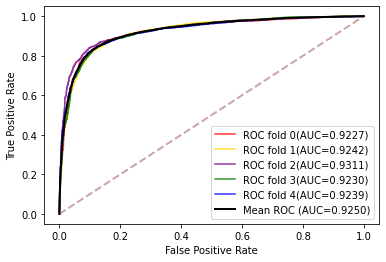

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))

# print("迭代寻找最优参数")
# k_range = [301, 401, 501, 601, 701, 801, 901, 999]
# cv_scores = [] #用来放每个模型的结果值
# for n in k_range:
#     print('n_estimators: %d '%(n))
#     RandomF = RandomForestClassifier(n_estimators=n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
#     scores = cross_val_score(RandomF,data_train0, labels_train0,
#                              cv=5,
#                              scoring='roc_auc', 
#                              n_jobs=-1)  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
#     cv_scores.append(scores.mean())
# print("best_n_neighbors is：", k_range[cv_scores.index(max(cv_scores))])

print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = A_data_train[i],A_data_test[i]
    Y_train,Y_test = np.array(A_labels_train[i]),np.array(A_labels_test[i])
    print('划分完毕！')
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_XGB = XGBClassifier(learning_rate=0.15,max_depth=500,n_estimators=500)
    print('开始训练')
    #训练模型
    best_XGB.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_XGB,'D:/DPIs/compare/model/'+'XGB_A_'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_XGB.predict(np.array(X_test))
    y_score_XGB = best_XGB.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0)) # , labels=[1,0]
    
    dd = np.vstack([Y_test, y_score_XGB[:,1]]).T
    XGB_data = pd.DataFrame(dd)
    XGB_data.to_csv('D:/DPIs/compare/predict/' + 'XGB_A_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_XGB[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('D:/DPIs/compare/evaluate/XGB_A_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('D:/DPIs/compare/image/'+ now + 'XGB_A_ROC.svg')
plt.show()      

In [7]:
del A_data_train, A_data_test, A_labels_train, A_labels_test 

#### 只有GCN

In [8]:
import scipy.sparse as sp
import pandas as pd
import numpy as np
creat_var = locals() # 利用locals()创建变量
creat_var = locals() # 利用locals()创建变量
Negative = pd.read_csv('D:/DPIs/data/NegativeSample.csv',header=None)
Nindex = pd.read_csv('D:/DPIs/data/NewRandomList.csv',header=None)
Negative[2] = Negative.apply(lambda x: 0 if x[0] < 0 else 0, axis=1)
for i in range(5):
    data_train_feature, data_test_feature = [], []
    Embedding_GCN = pd.read_csv('D:/DPIs/data/Emdebding_GCN_1'+str(i)+'.csv',header=None)
    train_data = pd.read_csv('D:/DPIs/data/DTIs_train'+str(i)+'.csv',header=None)
    train_data[2] = train_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    kk = []
    for j in range(5):
        if j !=i:
            kk.append(j)
    index = np.hstack([np.array(Nindex)[kk[0]],np.array(Nindex)[kk[1]],np.array(Nindex)[kk[2]],np.array(Nindex)[kk[3]]])
    result = train_data.append(pd.DataFrame(np.array(Negative)[index]))    
    labels_train = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[r,0]],np.array(Embedding_Node2vec)[result.iloc[r,0]]])
    for r in range(len(result)):# np.hstack([np.array(Embedding_GCN)[result.iloc[r,1]],np.array(Embedding_Node2vec)[result.iloc[r,1]]])
        data_train_feature.append(np.hstack([np.array(Embedding_GCN)[result.iloc[r,0]],
                                             np.array(Embedding_GCN)[result.iloc[r,1]]]))
    creat_var['G_data_train'+str(i)] = data_train_feature
    creat_var['G_labels_train'+str(i)] = labels_train
    print(len(labels_train))
    del labels_train, result, data_train_feature, r
    test_data = pd.read_csv('D:/DPIs/data/DTIs_test'+str(i)+'.csv',header=None)
    test_data[2] = test_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    result = test_data.append(pd.DataFrame(np.array(Negative)[np.array(Nindex)[i]]))    
    labels_test = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[x,0]],np.array(Embedding_Node2vec)[result.iloc[x,0]]])
    for x in range(len(result)):#np.hstack([np.array(Embedding_GCN)[result.iloc[x,1]],np.array(Embedding_Node2vec)[result.iloc[x,1]]])
        data_test_feature.append(np.hstack([np.array(Embedding_GCN)[result.iloc[x,0]],
                                            np.array(Embedding_GCN)[result.iloc[x,1]]]))
    creat_var['G_data_test'+str(i)] = data_test_feature
    creat_var['G_labels_test'+str(i)] = labels_test
    print(len(labels_test))
    del train_data, test_data, labels_test, result, data_test_feature, x   
    print(i)

18240
4560
0
18240
4560
1
18240
4560
2
18240
4560
3
18240
4560
4


In [9]:
G_data_train = [G_data_train0,G_data_train1,G_data_train2,G_data_train3,G_data_train4]
G_data_test = [G_data_test0,G_data_test1,G_data_test2,G_data_test3,G_data_test4]
G_labels_train = [G_labels_train0,G_labels_train1,G_labels_train2,G_labels_train3,G_labels_train4]
G_labels_test = [G_labels_test0,G_labels_test1,G_labels_test2,G_labels_test3,G_labels_test4]
print(len(G_data_train0))
print(np.array(G_data_train0).shape)
print(len(G_labels_test0))
print(np.array(G_labels_test0).shape)

18240
(18240, 160)
4560
(4560,)


进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[16:21:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[1998  282]
 [ 342 1938]]
---------------------------------------------

fold =  0
---------------------------------------------

[[1998  282]
 [ 342 1938]]
TN:1998, FP:282, FN:342, TP:1938
Acc: 0.8632
Sen: 0.85
Spec: 0.8763
Prec: 0.873
MCC: 0.7266
正在划分训练集和测试集...
划分完毕！
开始训练
[16:22:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2655819272.py:53: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2005  275]
 [ 355 1925]]
---------------------------------------------

fold =  1
---------------------------------------------

[[2005  275]
 [ 355 1925]]
TN:2005, FP:275, FN:355, TP:1925
Acc: 0.8618
Sen: 0.8443
Spec: 0.8794
Prec: 0.875
MCC: 0.7241
正在划分训练集和测试集...
划分完毕！
开始训练
[16:22:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2655819272.py:53: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2013  267]
 [ 401 1879]]
---------------------------------------------

fold =  2
---------------------------------------------

[[2013  267]
 [ 401 1879]]
TN:2013, FP:267, FN:401, TP:1879
Acc: 0.8535
Sen: 0.8241
Spec: 0.8829
Prec: 0.8756
MCC: 0.7082
正在划分训练集和测试集...
划分完毕！
开始训练
[16:22:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2655819272.py:53: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2018  262]
 [ 403 1877]]
---------------------------------------------

fold =  3
---------------------------------------------

[[2018  262]
 [ 403 1877]]
TN:2018, FP:262, FN:403, TP:1877
Acc: 0.8542
Sen: 0.8232
Spec: 0.8851
Prec: 0.8775
MCC: 0.7097
正在划分训练集和测试集...
划分完毕！
开始训练
[16:22:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2655819272.py:53: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2014  266]
 [ 393 1887]]
---------------------------------------------

fold =  4
---------------------------------------------

[[2014  266]
 [ 393 1887]]
TN:2014, FP:266, FN:393, TP:1887
Acc: 0.8555
Sen: 0.8276
Spec: 0.8833
Prec: 0.8765
MCC: 0.7121
AverageAcc: 0.85764
AverageSen: 0.83384
AverageSpec: 0.8814
AveragePrec: 0.8755200000000001
AverageMcc: 0.71614


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2655819272.py:53: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


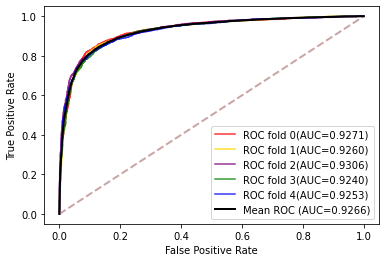

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))
print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = G_data_train[i],G_data_test[i]
    Y_train,Y_test = np.array(G_labels_train[i]),np.array(G_labels_test[i])
    print('划分完毕！')
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_XGB = XGBClassifier(learning_rate=0.15,max_depth=500,n_estimators=500)
    print('开始训练')
    #训练模型
    best_XGB.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_XGB,'D:/DPIs/compare/model/'+'XGB_G_'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_XGB.predict(np.array(X_test))
    y_score_XGB = best_XGB.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0)) # , labels=[1,0]
    
    dd = np.vstack([Y_test, y_score_XGB[:,1]]).T
    XGB_data = pd.DataFrame(dd)
    XGB_data.to_csv('D:/DPIs/compare/predict/' + 'XGB_G_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_XGB[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('D:/DPIs/compare/evaluate/XGB_G_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('D:/DPIs/compare/image/'+ now + 'XGB_G_ROC.svg')
plt.show()      

In [11]:
del G_data_train, G_data_test, G_labels_train, G_labels_test 

#### 只有Network Embedding

In [12]:
dd = pd.DataFrame(np.random.randint(0,1,node_features.shape[0]))
dd['index']=dd.index
dd

,0,index
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
1614,0,1614
1615,0,1615
1616,0,1616
1617,0,1617


In [13]:
import scipy.sparse as sp
import pandas as pd
import numpy as np
creat_var = locals() # 利用locals()创建变量
creat_var = locals() # 利用locals()创建变量
Negative = pd.read_csv('D:/DPIs/data/NegativeSample.csv',header=None)
Nindex = pd.read_csv('D:/DPIs/data/NewRandomList.csv',header=None)
Negative[2] = Negative.apply(lambda x: 0 if x[0] < 0 else 0, axis=1)
for i in range(5):
    data_train_feature, data_test_feature = [], []
    Embedding_grarep = pd.read_csv('D:/DPIs/data/Embedding_grarep'+str(i)+'.txt', sep=' ',header=None, error_bad_lines=False)
    Embedding_grarep = Embedding_grarep.sort_values(0,ascending=True)# 建立序号排序
    Embedding_grarep.set_index(0, inplace=True)
    Embedding_grarep['index'] = Embedding_grarep.index
    Embedding = pd.merge(dd,Embedding_grarep,how='left',on='index')
    Embedding = Embedding.fillna(int(0)).iloc[:,2:]
    train_data = pd.read_csv('D:/DPIs/data/DTIs_train'+str(i)+'.csv',header=None)
    train_data[2] = train_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    kk = []
    for j in range(5):
        if j !=i:
            kk.append(j)
    index = np.hstack([np.array(Nindex)[kk[0]],np.array(Nindex)[kk[1]],np.array(Nindex)[kk[2]],np.array(Nindex)[kk[3]]])
    result = train_data.append(pd.DataFrame(np.array(Negative)[index]))    
    labels_train = result[2]
    for r in range(len(result)):
        data_train_feature.append(np.hstack([np.array(Embedding)[result.iloc[r,0]],
                                            np.array(Embedding)[result.iloc[r,1]]]))
    creat_var['E_data_train'+str(i)] = data_train_feature
    creat_var['E_labels_train'+str(i)] = labels_train
    print(len(labels_train))
    del labels_train, result, data_train_feature, r
    test_data = pd.read_csv('D:/DPIs/data/DTIs_test'+str(i)+'.csv',header=None)
    test_data[2] = test_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    result = test_data.append(pd.DataFrame(np.array(Negative)[np.array(Nindex)[i]]))    
    labels_test = result[2]
    for x in range(len(result)):
        data_test_feature.append(np.hstack([np.array(Embedding)[result.iloc[x,0]],
                                            np.array(Embedding)[result.iloc[x,1]]]))
    creat_var['E_data_test'+str(i)] = data_test_feature
    creat_var['E_labels_test'+str(i)] = labels_test
    print(len(labels_test))
    del train_data, test_data, labels_test, result, data_test_feature, x   
    print(i)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


18240
4560
0
18240
4560
1
18240
4560
2
18240
4560
3
18240
4560
4


In [14]:
E_data_train = [E_data_train0,E_data_train1,E_data_train2,E_data_train3,E_data_train4]
E_data_test = [E_data_test0,E_data_test1,E_data_test2,E_data_test3,E_data_test4]
E_labels_train = [E_labels_train0,E_labels_train1,E_labels_train2,E_labels_train3,E_labels_train4]
E_labels_test = [E_labels_test0,E_labels_test1,E_labels_test2,E_labels_test3,E_labels_test4]
print(len(E_data_train0))
print(np.array(E_data_train0).shape)
print(len(E_labels_test0))
print(np.array(E_labels_test0).shape)

18240
(18240, 256)
4560
(4560,)


进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[16:36:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2142  138]
 [ 306 1974]]
---------------------------------------------

fold =  0
---------------------------------------------

[[2142  138]
 [ 306 1974]]
TN:2142, FP:138, FN:306, TP:1974
Acc: 0.9026
Sen: 0.8658
Spec: 0.9395
Prec: 0.9347
MCC: 0.8075
正在划分训练集和测试集...
划分完毕！
开始训练
[16:37:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2255354236.py:55: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2140  140]
 [ 308 1972]]
---------------------------------------------

fold =  1
---------------------------------------------

[[2140  140]
 [ 308 1972]]
TN:2140, FP:140, FN:308, TP:1972
Acc: 0.9018
Sen: 0.8649
Spec: 0.9386
Prec: 0.9337
MCC: 0.8057
正在划分训练集和测试集...
划分完毕！
开始训练
[16:37:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2255354236.py:55: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2155  125]
 [ 335 1945]]
---------------------------------------------

fold =  2
---------------------------------------------

[[2155  125]
 [ 335 1945]]
TN:2155, FP:125, FN:335, TP:1945
Acc: 0.8991
Sen: 0.8531
Spec: 0.9452
Prec: 0.9396
MCC: 0.8017
正在划分训练集和测试集...
划分完毕！
开始训练
[16:37:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2255354236.py:55: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2134  146]
 [ 348 1932]]
---------------------------------------------

fold =  3
---------------------------------------------

[[2134  146]
 [ 348 1932]]
TN:2134, FP:146, FN:348, TP:1932
Acc: 0.8917
Sen: 0.8474
Spec: 0.936
Prec: 0.9297
MCC: 0.7864
正在划分训练集和测试集...
划分完毕！
开始训练
[16:38:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2255354236.py:55: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[2166  114]
 [ 347 1933]]
---------------------------------------------

fold =  4
---------------------------------------------

[[2166  114]
 [ 347 1933]]
TN:2166, FP:114, FN:347, TP:1933
Acc: 0.8989
Sen: 0.8478
Spec: 0.95
Prec: 0.9443
MCC: 0.802
AverageAcc: 0.8988200000000001
AverageSen: 0.8558
AverageSpec: 0.9418599999999999
AveragePrec: 0.9363999999999999
AverageMcc: 0.8006599999999999


C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/2255354236.py:55: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


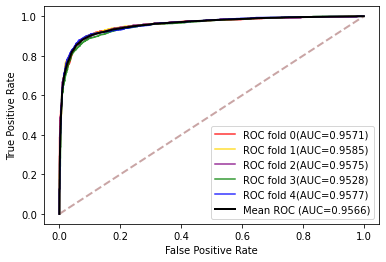

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))


print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = E_data_train[i],E_data_test[i]
    Y_train,Y_test = np.array(E_labels_train[i]),np.array(E_labels_test[i])
    print('划分完毕！')
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_XGB = XGBClassifier(learning_rate=0.15,max_depth=500,n_estimators=500)
    print('开始训练')
    #训练模型
    best_XGB.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_XGB,'D:/DPIs/compare/model/'+'XGB_N_'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_XGB.predict(np.array(X_test))
    y_score_XGB = best_XGB.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0)) # , labels=[1,0]
    
    dd = np.vstack([Y_test, y_score_XGB[:,1]]).T
    XGB_data = pd.DataFrame(dd)
    XGB_data.to_csv('D:/DPIs/compare/predict/' + 'XGB_N_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_XGB[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('D:/DPIs/compare/evaluate/XGB_N_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('D:/DPIs/compare/image/'+ now + 'XGB_N_ROC.svg')
plt.show()      

In [16]:
del E_data_train, E_data_test, E_labels_train, E_labels_test 

#### Attribute + Network Embedding

###   画ROC曲线

C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/4227976091.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/4227976091.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/4227976091.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/4227976091.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/4227976091.py:24: DeprecationWarning: scipy.interp is deprecated and will be remove

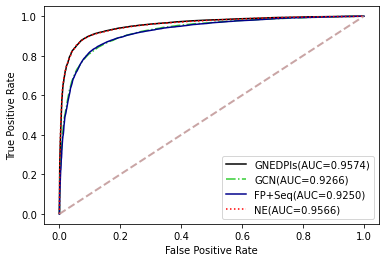

In [18]:
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time
# 画ROC曲线
colorlist = ['red', 'gold', 'purple', 'limegreen', 'darkblue', 'black']

for i in range(1):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/predict/XGB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
    
     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,color=colorlist[5],label=r'GNEDPIs(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb =  'D:/DPIs/compare/predict/XGB_G_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,linestyle='-.',color=colorlist[3],label=r'GCN(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb =  'D:/DPIs/compare/predict/XGB_A_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,linestyle='-',color=colorlist[4],label=r'FP+Seq(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb =  'D:/DPIs/compare/predict/XGB_N_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,linestyle=':',color=colorlist[0],label=r'NE(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)  
      
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)    
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')   
plt.savefig('D:/DPIs/compare/image/Compare_Features_ROC.svg')
plt.show()    

### 画PR曲线

C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/1830401555.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/1830401555.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/1830401555.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/1830401555.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_6304/1830401555.py:27: DeprecationWarning: scipy.interp is deprecate

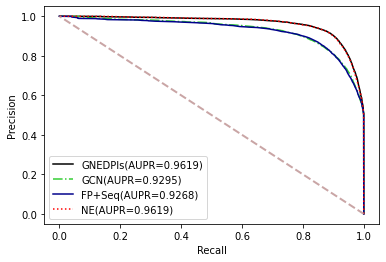

In [19]:
# 画PR曲线
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from scipy import interp
import numpy as np
import pandas as pd

colorlist = ['red', 'gold', 'purple', 'limegreen', 'darkblue', 'black']

for i in range(1): 
    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/predict/XGB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)
    
    # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,color=colorlist[5],label=r'GNEDPIs(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)
    
    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/compare/predict/XGB_G_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)

     # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,linestyle='-.',color=colorlist[3],label=r'GCN(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)
    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/compare/predict/XGB_A_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)

     # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,linestyle='-',color=colorlist[4],label=r'FP+Seq(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)
    
    Ps = []
    RPs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/compare/predict/XGB_N_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)

     # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,linestyle=':',color=colorlist[0],label=r'NE(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)
    
plt.plot([1,0],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)    
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')   
plt.savefig('D:/DPIs/compare/image/Compare_features_PR.svg')
plt.show()   